# Week 11 Assignments
Part 1 the regular questions section is total 100 pts. Part 2 contains an extra question at the end, which is worth 25% of the regular questions.  

## How to Make Your Answers 
- You must carefully read cells containing "# QUESTION IN THIS CELL #". In those cells, you must complete certain variables / methods / cell following the instruction. 
- If you have any question or found bugs, please post it on the Q&A board of KLMS or send me an email (takyeonlee@kaist.ac.kr).  

## Make sure your notebook runs without error
- After finishing the entire notebook, use (Kernel > Restart Kernel and Run All Cells) and __make sure all the cells run without any syntax error__.  

---
## Part 1. Regular Questions (100pts)
- Now part 1 covers both knowledge check and coding exercise. 
- Before answering these questions, make sure you watched the corresponding lecture and tutorial videos.
- Carefully read questions in comments, and put your answers in `answer_N` variables (where N=0,1,2,...).

### Knowledge Check of A/B Test

In [1]:
# QUESTION IN THIS CELL #
''' Question 1-10. Indicate whether the following statements are True or False  '''

# STATEMENT.  A/B testing aims to compare two or more variations to see which 
#             one performs the best. 
answer_1 = None # Replace None with True or False

# STATEMENT.  A/B testing is highly accurate because it runs on the entire user population
answer_2 = None # Replace None with True or False

# STATEMENT.  As a benefit of A/B testing, designers can pursuade other people 
#             with empirical evidences
answer_3 = None # Replace None with True or False

# STATEMENT.  A/B testing is a special kind of randomized controlled experiment 
answer_4 = None # Replace None with True or False

# STATEMENT.  If designers run A/B test properly, they can improve their 
#             understanding of user behavior.
answer_5 = None # Replace None with True or False

# STATEMENT.  A/B test to start with a very few # of design variations
answer_6 = None # Replace None with True or False

# STATEMENT.  A/B testing is an iterative process by nature since designers would 
#             gradually improve their understanding of user behavior  
answer_7 = None # Replace None with True or False

# STATEMENT.  Having a clear hypothesis helps designer consider potential confounding 
#             factors and gain generalizable insights
answer_8 = None # Replace None with True or False

# STATEMENT.  To minimize temporal bias, duration of A/B testing should be as short 
#             as possible
answer_9 = None # Replace None with True or False

# STATEMENT.  When analyzing result of A/B testing, it is important to drill down  
#             to small subgroups whose winners could be different from the global winner
answer_10 = None # Replace None with True or False

---
### A/B Testing Practice  
Let's practice A/B testing with an imaginary case study below.  

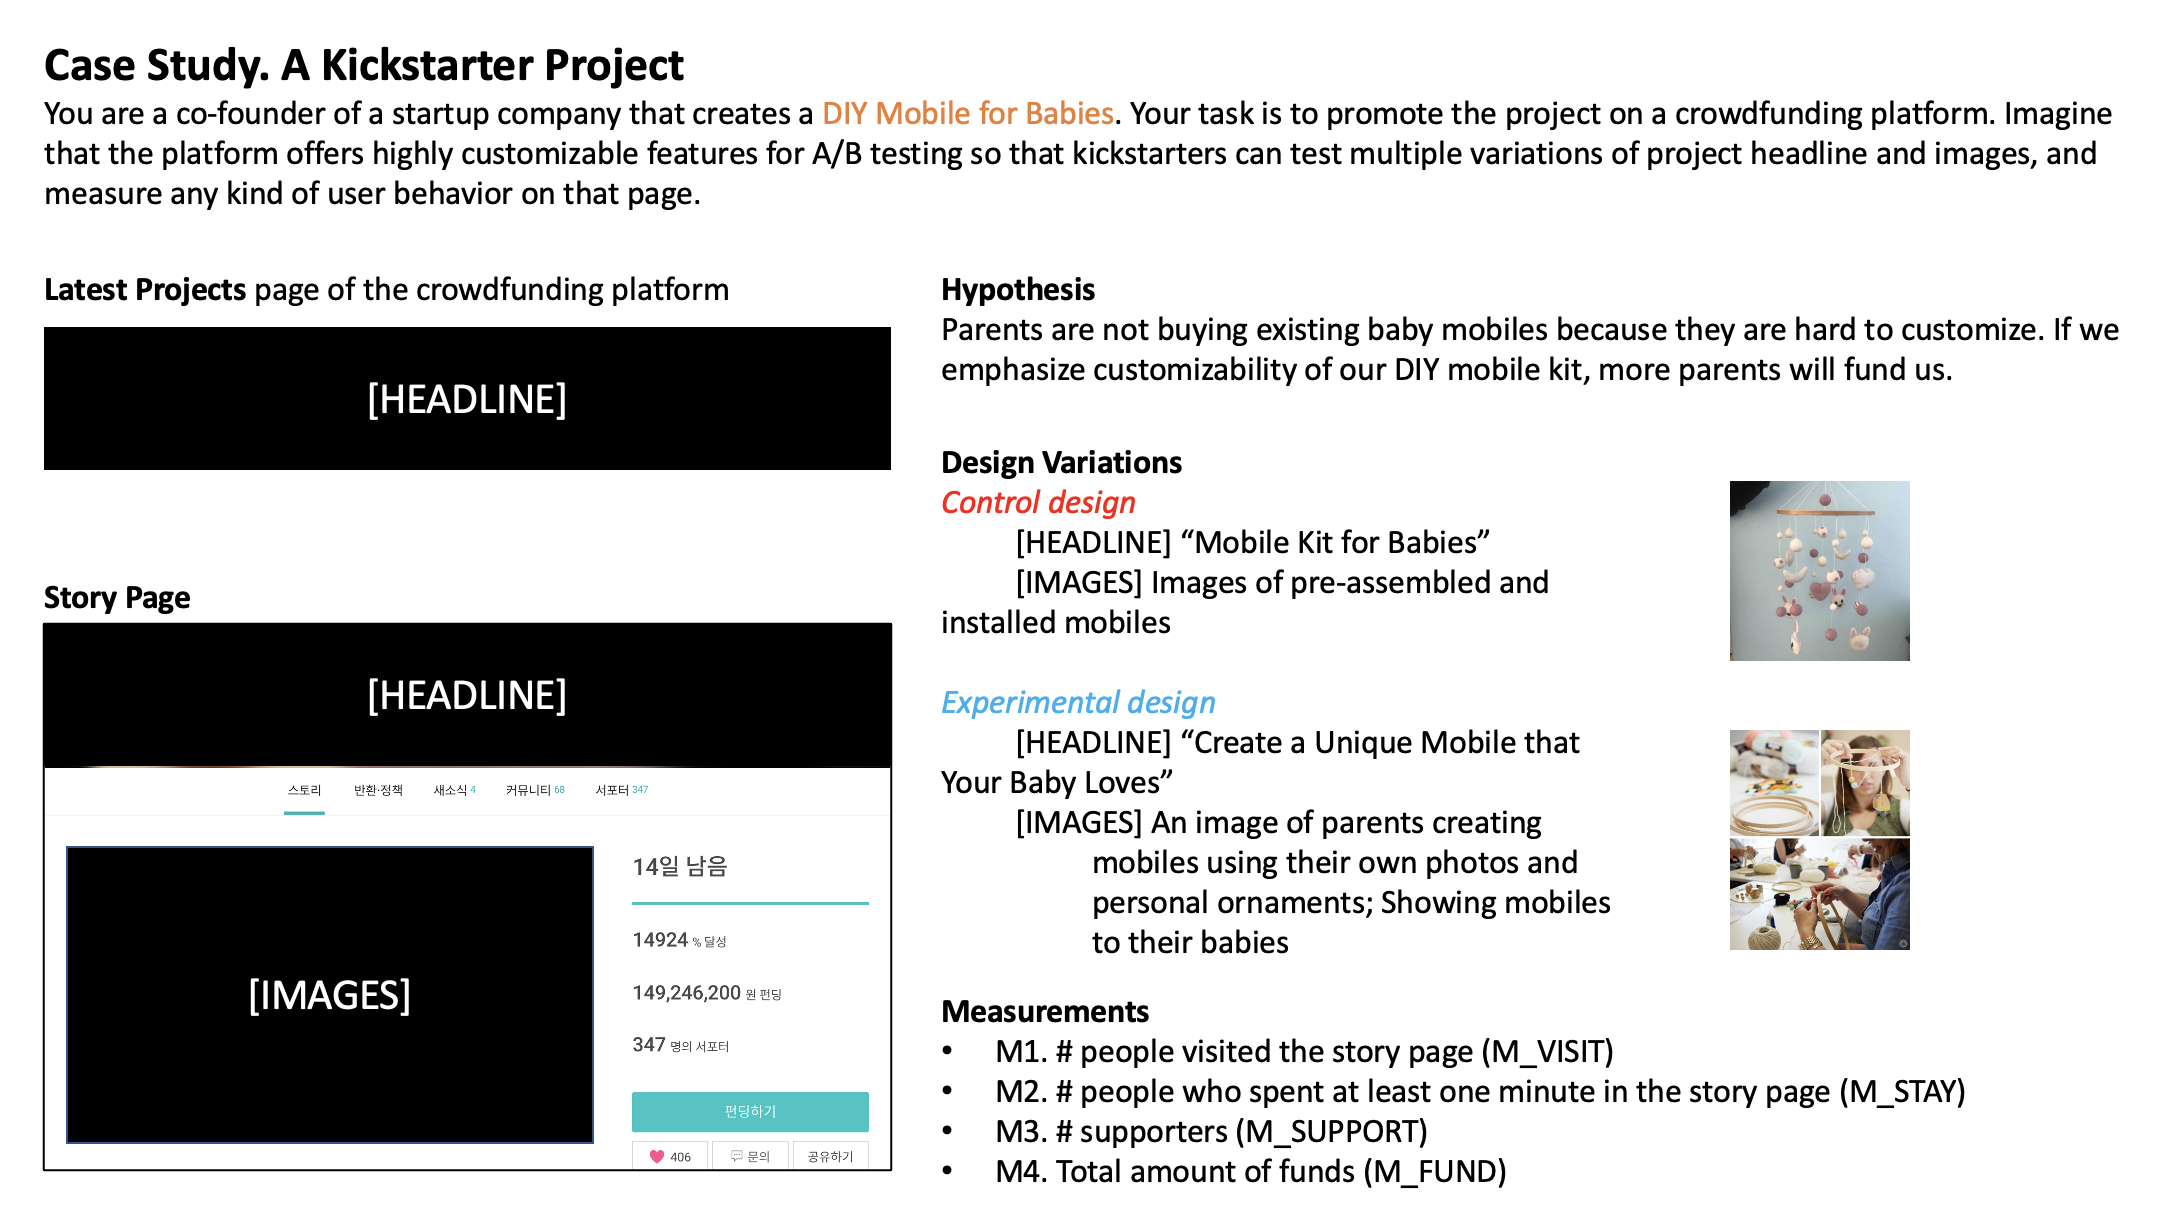

The testing was conducted for two weeks from launching. On the crowdsourcing platform's Latest Projects list, only the headline of each variation was exposed to 1000 people (i.e. total 2000 people saw either variation of the project link). 

The following (handcrafted) dataset contains the four measures. Analyze it to accept / reject the hypothesis and find out who's the winner. 


In [2]:
measures = {
    "control": {
        "M_VISIT": 600,
        "M_STAY": 200,
        "M_SUPPORT": 10,
        "M_FUND": 100
    },
    "experimental": {
        "M_VISIT": 500,
        "M_STAY": 200,
        "M_SUPPORT": 20,
        "M_FUND": 200
    }
}

In [3]:
# QUESTION IN THIS CELL #
''' What can you tell from M_VISIT only? '''
answer_11 = "YOUR INTERPRETATION (<100 characters)"

''' What can you tell from M_VISIT and M_STAY? '''
answer_12 = "YOUR INTERPRETATION (<100 characters)"

''' What can you tell from M1-M4? '''
answer_13 = "YOUR INTERPRETATION (<100 characters)"

''' As a co-founder of the project, how would you improve the design to gather 
    more supporters and funds? 
'''
answer_14 = "YOUR IDEAS (<500 characters)"

---

### TUTORIAL. A/B Test Analysis from Log Data

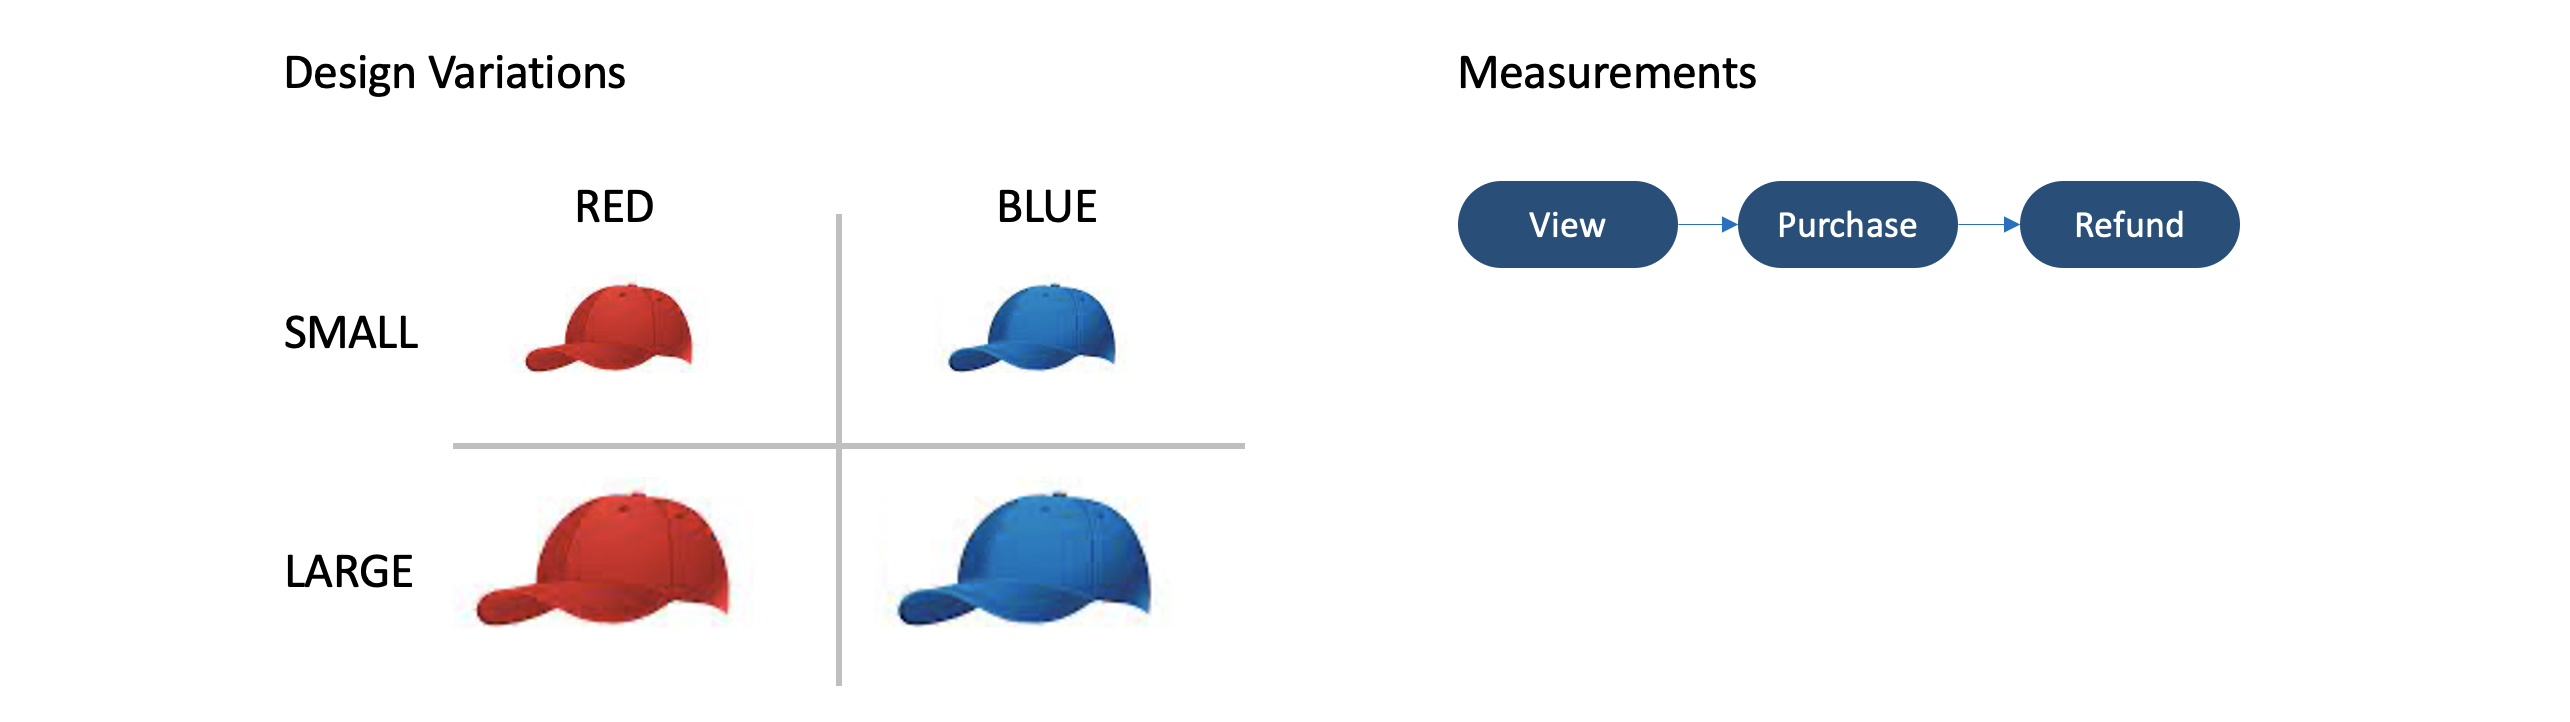
Imagine that you are a designer who recently launched a new product. The product has two colors (red and blue) and two sizes (small and large) - i.e. tested four design variations. 400 users are assigned to each variation (total 1600 users). The log data consists of three types of events (view, purchase, and refund) that occur in sequence. For instance, each user must be either "viewed", "viewed and purchase", or "views, purchased, and refunded". You also know the age group (under20 / over20) of each user. 

__THIS SECTION IS A TUTORIAL - NO QUESTION BEFORE THE EXTRA PART__

#### Load the two datasets
The `log_data.csv` file contains five columns. 
user's unique id (UID) and the type of event (EVENT). Note that each user might have multiple records. For instance, `user_1`has three records of `VIEW`, `PURCHASE`, and `REFUND` - meaning that the user has viewed, purchased, and refunded the product assigned to him/her.  

You may wonder why two datasets were created. It is a common practice to separate log data and personal information of users - in order to save storage for hundreds of events done by the same user.

In [4]:
import pandas as pd
log_data = pd.read_csv("log_data.csv")
log_data

,UID,EVENT
0,user_1,VIEW
1,user_2,VIEW
2,user_2,PURCHASE
3,user_2,REFUND
4,user_3,VIEW
...,...,...
2199,user_3189,VIEW
2200,user_3194,VIEW
2201,user_3194,PURCHASE
2202,user_3199,VIEW


Second, `user_info.csv` contains each user's age group (AGE) and the condition assigned to him/her (DESIGN_GROUP).    
- AGE is either `user20` or `over20`.  
- DESIGN_GROUP follows the format of `[COLOR]_[SIZE]` where COLOR is either `red` or `blue`, and SIZE is either `small` or `large`. For instance, "red_small" means the user is assigned to see only small red caps. 

In [5]:
user_info = pd.read_csv("user_info.csv")
user_info

,UID,AGE,DESIGN_GROUP
0,user_1,under20,red_small
1,user_2,under20,red_small
2,user_3,under20,red_small
3,user_4,under20,red_small
4,user_5,under20,red_small
...,...,...,...
3195,user_3196,over20,blue_large
3196,user_3197,over20,blue_large
3197,user_3198,over20,blue_large
3198,user_3199,over20,blue_large


#### Merging two dataframes
Let's merge the two dataframes into one. Since they both have the same `UID` column, we can merge `user_info` into the `log_data` using Panda's merge method. Here's a [tutorial](https://towardsdatascience.com/all-the-pandas-merge-you-should-know-for-combining-datasets-526b9ecaf184) that I found useful. 

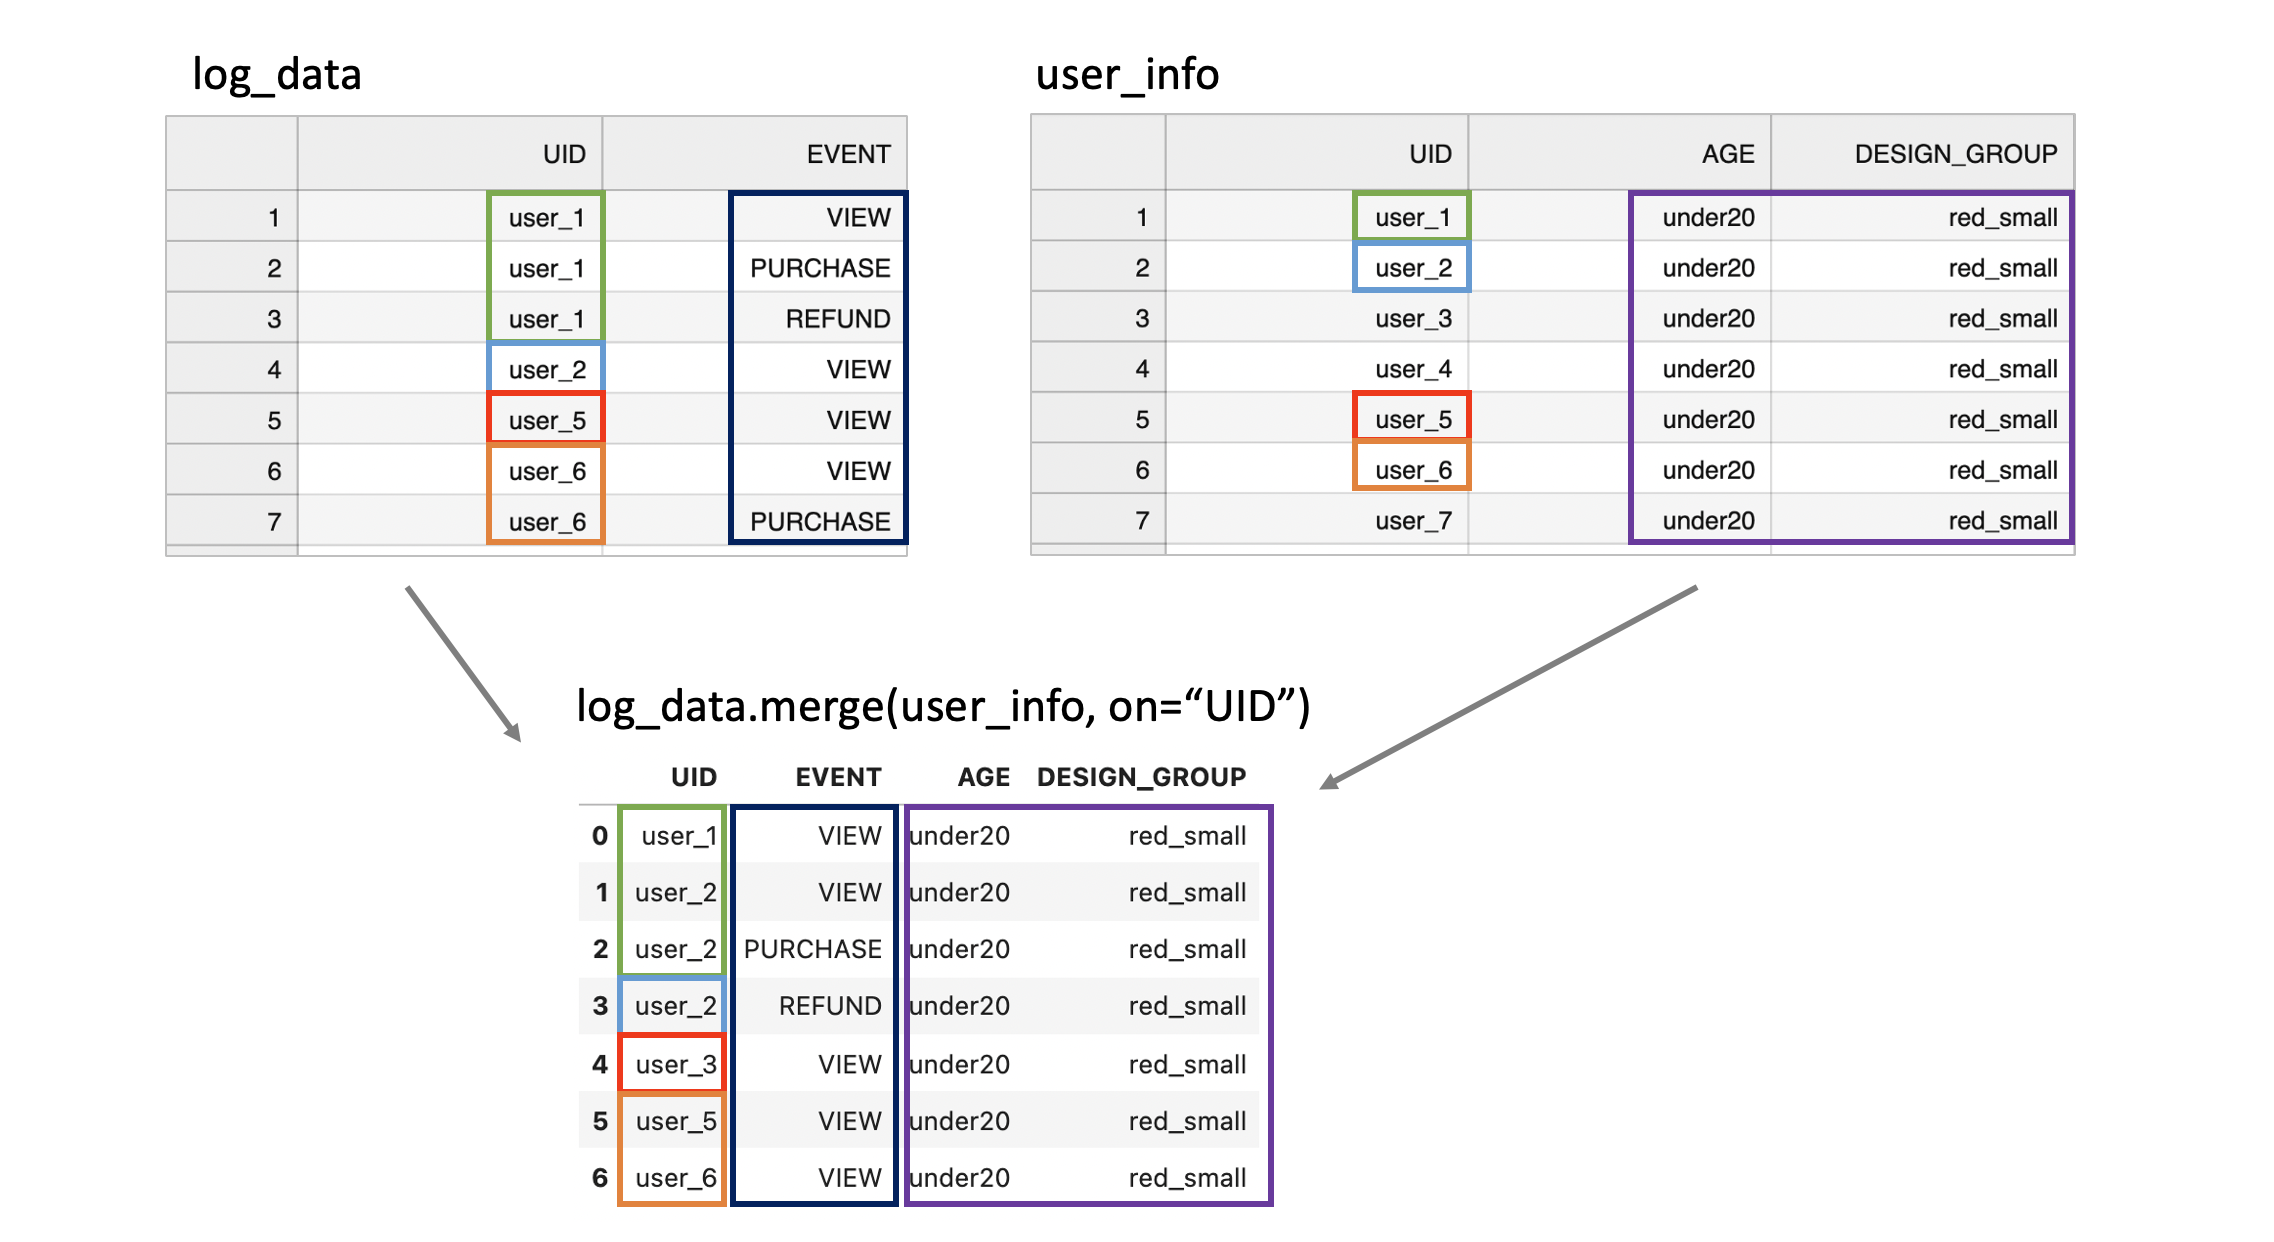

In [83]:
df = log_data.merge(user_info, on="UID")

#### Splitting `DESIGN_GROUP` into `COLOR` and `SIZE`
To add a new column based on existing columns for each row, we can use `apply` method. If you don't know how to use `lambda`, this [tutorial](https://towardsdatascience.com/create-new-column-based-on-other-columns-pandas-5586d87de73d) might be helpful. 

In [84]:
df["COLOR"] = df.apply(lambda row: row["DESIGN_GROUP"].split("_")[0], axis=1)
df["SIZE"] = df.apply(lambda row: row["DESIGN_GROUP"].split("_")[1], axis=1)

# Let's drop DESIGN_GROUP column since we have COLOR and SIZE now
df = df.drop("DESIGN_GROUP", axis=1)
df

,UID,EVENT,AGE,COLOR,SIZE
0,user_1,VIEW,under20,red,small
1,user_2,VIEW,under20,red,small
2,user_2,PURCHASE,under20,red,small
3,user_2,REFUND,under20,red,small
4,user_3,VIEW,under20,red,small
...,...,...,...,...,...
2199,user_3189,VIEW,over20,blue,large
2200,user_3194,VIEW,over20,blue,large
2201,user_3194,PURCHASE,over20,blue,large
2202,user_3199,VIEW,over20,blue,large


#### Group-By to get the frequency of each combination of factors
Here's the last (very important) step to get the measurements. We use `group by` method to group records into multiple groups, and extract measured scores (i.e. frequency in this case).  Here's a good [tutorial](https://www.geeksforgeeks.org/pandas-groupby/) to learn group by method. I highly recommend you to read it.  

In [101]:
# Let's start from the overall measurements (without splitting into design variations)
group = df.groupby([df["EVENT"]]) # Put records into three groups since there are three EVENT values (PURCHASE, REFUND, VIEW)
group.count()     # For each group we calculate frequency of records.   

,UID,AGE,COLOR,SIZE
EVENT,,,,
PURCHASE,431,431,431,431
REFUND,136,136,136,136
VIEW,1637,1637,1637,1637


Overall, we got 1637 views, 431 purchses, and 136 refunds. Let's break it down to design variations. 

In [136]:
# Group by 'COLOR'
group = df.groupby([df["COLOR"], df["EVENT"]])
gc = group.count()
gc

UID  AGE  SIZE
COLOR EVENT                   
blue  PURCHASE  176  176   176
      REFUND     13   13    13
      VIEW      698  698   698
red   PURCHASE  255  255   255
      REFUND    123  123   123
      VIEW      939  939   939

Now we can compare how blue and red caps have different # events. For VIEW events, red caps (939) outperformed blue (698). For PURCHASE as well, red (255) outperformed blue (176). However, REFUND was much more common for red (123) than blue (13). Why did those significant amount of people refunded red caps? That might be the follow-up question for analysts! 

In [104]:
# Group by 'SIZE'
group = df.groupby([df["SIZE"], df["EVENT"]])
group.count()

UID  AGE  COLOR
SIZE  EVENT                    
large PURCHASE  235  235    235
      REFUND     74   74     74
      VIEW      785  785    785
small PURCHASE  196  196    196
      REFUND     62   62     62
      VIEW      852  852    852

From the table above, I cannot find any significant difference between large and small sizes.

In [143]:
# Group by 'COLOR' and then 'SIZE'
group = df.groupby([df["COLOR"],df["SIZE"], df["EVENT"]])
group.count()

UID  AGE
COLOR SIZE  EVENT             
blue  large PURCHASE   93   93
            REFUND     10   10
            VIEW      315  315
      small PURCHASE   83   83
            REFUND      3    3
            VIEW      383  383
red   large PURCHASE  142  142
            REFUND     64   64
            VIEW      470  470
      small PURCHASE  113  113
            REFUND     59   59
            VIEW      469  469

As we add more columns to group-by, it becomes harder to interpret the numbers.  Maybe bar charts can help. 

   COLOR   SIZE     EVENT  UID  AGE
0   blue  large  PURCHASE   93   93
1   blue  large    REFUND   10   10
2   blue  large      VIEW  315  315
3   blue  small  PURCHASE   83   83
4   blue  small    REFUND    3    3
5   blue  small      VIEW  383  383
6    red  large  PURCHASE  142  142
7    red  large    REFUND   64   64
8    red  large      VIEW  470  470
9    red  small  PURCHASE  113  113
10   red  small    REFUND   59   59
11   red  small      VIEW  469  469


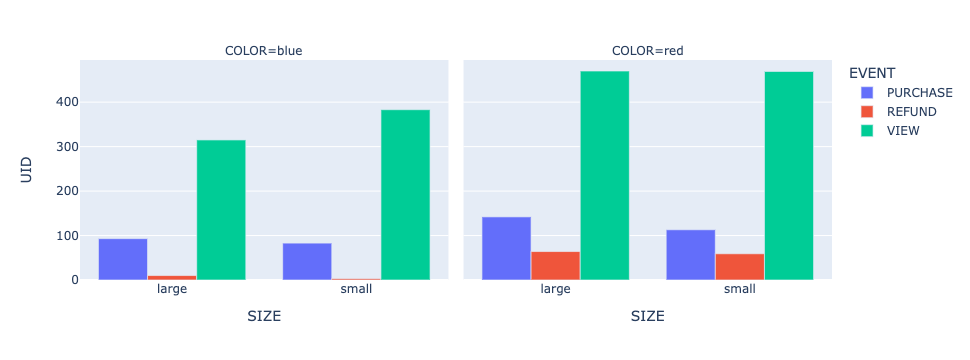

In [154]:
import plotly.express as px 

gc = group.count()  
gc = gc.reset_index()   # reset_index convert it to a plain dataframe so that we can draw charts
print(gc)
px.bar(gc, x="SIZE", y="UID", color="EVENT" , barmode="group", facet_col="COLOR", height=300)

The above chart might be one of the best way to compare the two design factors (SIZE and COLOR) with the three measurements (# VIEW, # PURCHASE, # REFUND).  It's clear that red caps bring more customers to VIEW our web page, and PURCHASE more caps. However, red caps (especially small ones) are refunded much more frequently than blue caps.  

---
### Extra Question (25pts)
We didn't use the age information (over20 / under20) information in the previous questions. What if you use that information as well?  Copy some of the above cells and modify as-needed-to analyze combinatorial effects of the three factors (size, color, age). 

In [54]:
import plotly.express as px
px.bar(chartData, y="PURCHASE", x="size", color="color", barmode="group", color_discrete_sequence=["red","blue"])

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['color', 'size', 'event', 'freq'] but received: PURCHASE

The above chart tells that red caps outperformed blue caps overall. Blue large baseball cap was the worst in terms of CTR. 